以下程序计算了两个多项式 $f_1$ and $f_2$ 的乘积 $f_1*f_2$,其中 $f_1$ 的导数的根是从 0 开始的递减序列，而 $f_2$ 的导数的根是从一个随机数开始的递减序列。程序检查了乘积是否满足 Upsilon 稳定性条件，并在不满足时输出相关信息. 最终,如果所有乘积都满足 Upsilon 稳定性 (U-stable) 条件,则输出相应的消息.

例如，取
degree of f1=10
degree of f2=14
程序运行了1000 次。输出： 
All products are Upsilon stable!

这有力地说明 U-stable polynomial 的乘积还是 U-stable

In [42]:
import sigma as sg
import random
import numpy as np
random.seed()
d=int(random.uniform(4,7)) #\\degree of polynomial
m=d+int(random.uniform(0,5)) # variable number x_1,x_2,...,x_m
count_realstable=0 # couning real stable polynomials
flag=True
print("degree of f1 is", d)
print("\degree of f2 is", m)
for l in range(100000):
    
    # generate roots of derivatives in descending order
    roots1=[0]
    roots2=[random.uniform(-100,100)] # roots start with 0
    for i in range(1,d):

        new1=roots1[i-1]-random.uniform(0.2,15)
        
        roots1.append(new1)
    for i in range(1,m):   
        new2=roots2[i-1]-random.uniform(1,15)
        roots2.append(new2)
    # construct polynomial by roots of derivatives
    f1=sg.constr_f(roots1)
    f2=sg.constr_f(roots2)
    product=sg.poly_product(f1,f2)
    if not sg.UpsilonStable(product):
        print("f1 is", f1)
        print("f2 is", f2)
        print("f1*f2 is", product)
        print("f1*f2 is not U-stable!")
        flag=False
if flag:
    print("All products are U-stable!")

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/fg/ycbk_6dn5819g85_515d9w5c0000gn/T/ipykernel_73306/219370246.py:10: SyntaxWarning: invalid escape sequence '\d'
  print("\degree of f2 is", m)


degree of f1 is 4
\degree of f2 is 4


/var/folders/fg/ycbk_6dn5819g85_515d9w5c0000gn/T/ipykernel_73306/219370246.py:10: SyntaxWarning: invalid escape sequence '\d'
  print("\degree of f2 is", m)


KeyboardInterrupt: 

In [ ]:
import sympy as sp
lam = sp.symbols('lambda')    
A = [[0, 1, lam, 1-lam], [1, 0, 1-lam, lam], [lam, 1-lam, 0, 1], [1-lam, lam, 1, 0]]
eigenvalues = sp.Matrix(A).eigenvals()
print("Eigenvalues of the matrix A are:", eigenvalues)
eigenpolynomial = sp.poly(sp.Matrix(A).charpoly(lam))
print("Characteristic polynomial of the matrix A is:", eigenpolynomial)

Eigenvalues of the matrix A are: {2: 1, 2*lambda - 2: 1, -2*lambda: 1, 0: 1}
Characteristic polynomial of the matrix A is: Poly(_lambda**4 + (-4*lambda**2 + 4*lambda - 4)*_lambda**2 + (8*lambda**2 - 8*lambda)*_lambda, _lambda, domain='ZZ[lambda]')


$\lambda^4 + (-4*\lambda^2 + 4*\lambda - 4)*\lambda^2 + (8*\lambda^2 - 8*\lambda)*\lambda$

以下代码检验了 univariate polynomial f,g 什么时候有 $f\prec g$。 猜想是如果 f 的 root sequence “interlace” $g$ 的root sequence 时 $f\prec g$ 成立。 

case 1, $\deg f=\deg g-1$, 称 {$r_i(f)$} interlace {$r_i(g)$} 如果 $r_i(g)\leq r_i(f)\leq r_{i+1}g$。

case 2, $d=\deg f=\deg g$, 称 {$r_i(f)$} interlace {$r_i(g)$} 如果 $r_i(g)\leq r_i(f)\leq r_{i+1}g$ for $0\leq i\leq d-1$ and $r_{d}(f)\leq r_{d}(g)$ 

下面的程序验证了 case 1,2 是 $f\prec g$ 如果 $r_i(f)$ interlace $r_i(g)$.

In [ ]:
## The following program indicates case 1 is true
import sigma as sg
import random
import numpy as np
random.seed()
d=int(random.uniform(14,27)) #degree of polynomial
m=d-1 # variable number x_1,x_2,...,x_m
count_realstable=0 # couning real stable polynomials
flag=True
print("degree of f1 is", d)
print("degree of f2 is", m)
for l in range(10000):
    
    # generate roots of derivatives in descending order
    roots1=[0]
    
    for i in range(1,d):

        new1=roots1[i-1]-random.uniform(0.2,5)
        
        roots1.append(new1)
    la=random.uniform(0,1) # roots start with 0
    roots2=[]
    for i in range(m):   
        la=random.uniform(0,1)
        new2=la*roots1[i]+(1-la)*roots1[i+1]
        #new2=min(new2,roots1[i]-random.uniform(0,3))
        roots2.append(new2)
    # construct polynomial by roots of derivatives
    f1=sg.constr_f(roots1)
    f2=sg.constr_f(roots2).tolist()
    f2.append(0)
    a=1
    a=random.uniform(3,10)
    b=0
    b=random.uniform(-100,100)
    domin=sg.poly_product([a,b],f2)
    for i in range(len(f2)):
        domin[i]=domin[i]+f1[i]
        
    if not sg.UpsilonStable(domin):
        print("f1 is", f1)
        print("roots1 is", roots1)
        print("f2 is", f2[:-1])
        print("roots2 is", roots2)
        print("at+b is", a,"t+",b)
        print("(at+b)*f2+f1 is", domin)
        print("t*f2+f1 is not U-stable!")
        flag=False
if flag:
    print("All are U-stable!")


degree of f1 is 21
degree of f2 is 20


KeyboardInterrupt: 

In [ ]:
## The following program indicates case 2 is true

import sigma as sg
import random
import numpy as np
random.seed()
d=int(random.uniform(9,20)) #degree of polynomial
m=d # variable number x_1,x_2,...,x_m
count_realstable=0 # couning real stable polynomials
flag=True
print("degree of f1 is", d)
print("degree of f2 is", m)
for l in range(1000):
    
    # generate roots of derivatives in descending order
    roots1=[0]
    
    for i in range(1,d):

        new1=roots1[i-1]-random.uniform(0.2,5)
        
        roots1.append(new1)
    la=random.uniform(0,1) # roots start with 0
    roots2=[]
    for i in range(m-1):   
        la=random.uniform(0,1)
        new2=la*roots1[i]+(1-la)*roots1[i+1]
        #new2=min(new2,roots1[i]-random.uniform(0,3))
        roots2.append(new2)
    new2=roots1[m-1]-random.uniform(0.2,5)
    roots2.append(new2)
    # construct polynomial by roots of derivatives
    f1=sg.constr_f(roots1)
    f2=sg.constr_f(roots2).tolist()
    f2.append(0)
    a=1
    a=random.uniform(3,10)
    b=0
    b=random.uniform(-100,100)
    domin=[a*f2[0]]
    for i in range(1,len(f2)):
        domin.append(a*f2[i]+f1[i-1]+b*f2[i-1])
        
    if not sg.UpsilonStable(domin):
        print("f1 is", f1)
        print("roots1 is", roots1)
        print("f2 is", f2[:-1])
        print("roots2 is", roots2)
        print("at+b is", a,"t+",b)
        print("(at+b)*f2+f1 is", domin)
        print("t*f2+f1 is not U-stable!")
        flag=False
if flag:
    print("All are U-stable!")

degree of f1 is 17
degree of f2 is 17
All are U-stable!


Lin 称 $f\lessdot g$ 如果 $r_i(f)\leq r_i (g)$. 对于我们的情况，$f\lessdot g$ 并不能说明 $f(t)\prec g(t)$ 是 U-stable。  反例验证程序如下。

In [ ]:
import sigma as sg
import random
import numpy as np
random.seed()
d=int(random.uniform(4,8)) #degree of polynomial
m=d-1 # variable number x_1,x_2,...,x_m
count_realstable=0 # couning real stable polynomials
flag=True
print("degree of f1 is", d)
print("degree of f2 is", m)
for l in range(10000):
    
    # generate roots of derivatives in descending order
    roots1=[0]
    
    for i in range(1,d):

        new1=roots1[i-1]-random.uniform(0.2,5)
        
        roots1.append(new1)
    la=random.uniform(0,1) # roots start with 0
    roots2=[roots1[0]-random.uniform(0,3)]
    for i in range(1,m):   
        la=random.uniform(0,1)
        new2=roots2[i-1]-random.uniform(0,3)
        new2=min(new2,roots1[i]-random.uniform(0,3))
        roots2.append(new2)
    # construct polynomial by roots of derivatives
    f1=sg.constr_f(roots1)
    f2=sg.constr_f(roots2).tolist()
    f2.append(0)
    a=1
    a=random.uniform(3,10)
    b=0
    b=random.uniform(-100,100)
    domin=sg.poly_product([a,b],f2)
    for i in range(len(f2)):
        domin[i]=domin[i]+f1[i]
        
    if not sg.UpsilonStable(domin):
        print("f1 is", f1)
        print("roots1 is", roots1)
        print("f2 is", f2[:-1])
        print("roots2 is", roots2)
        print("at+b is", a,"t+",b)
        print("(at+b)*f2+f1 is", domin)
        print("t*f2+f1 is not U-stable!")
        flag=False
if flag:
    print("All are U-stable!")

degree of f1 is 6
degree of f2 is 5
f1 is [ 1.00000000e+00  5.67581262e+01  1.12097848e+03  1.05113063e+04
  2.35865859e+04  1.87626170e+04 -0.00000000e+00]
roots1 is [0, -0.6718861367745275, -0.9120820111566077, -4.508013465255228, -5.618621065056788, -9.45968769845985]
f2 is [1.0, 32.79500558070063, 429.49523940658855, 2659.223826335041, 7731.525079129401, 4311.218022164108]
roots2 is [-0.7136863780867183, -3.616457855041615, -4.072023443736978, -6.292595971916981, -6.559001116140125]
at+b is 4.9077087675320925 t+ 67.90049892453388
(at+b)*f2+f1 is [5.9077087675320925, 285.6069615349614, 5455.613270263711, 52724.94347709066, 242093.2839080467, 564895.2297777077, 292733.8546773851, 0.0]
t*f2+f1 is not U-stable!
f1 is [ 1.00000000e+00  3.11059850e+01  3.77845587e+02  2.28613112e+03
  7.05443348e+03  1.04933516e+04 -0.00000000e+00]
roots1 is [0, -1.8312019697699897, -2.171553075413237, -3.0652642851165686, -3.8852617908358718, -5.184330830309657]
f2 is [1.0, 59.97696376898486, 1380.22368

假设 $f(t)$ 是 Upsilon-stable 且系数均非负，那么我们可以考虑齐次化 $F(t,y)=f(t/y)y^d$。 这个齐次化的过程带来一个问题：是否有 $\partial_y F(t,1)$ 是 U-stable?

In [43]:
import sigma as sg
import random
import numpy as np
random.seed()
d=int(random.uniform(4,18)) #degree of polynomial
#m= d-1 # variable number x_1,x_2,...,x_m
#count_realstable=0 # couning real stable polynomials
flag=True
print("degree of f1 is", d)
#print("degree of f2 is", m)
for l in range(10000):
    
    # generate roots of derivatives in descending order
    roots1=[0]
    
    for i in range(1,d):

        new1=roots1[i-1]-random.uniform(0.2,5)
        
        roots1.append(new1)
    
    # construct polynomial by roots of derivatives
    f=sg.constr_f(roots1)
    f_y=f.copy()
    for i in range(len(f_y)):
        f_y[i]=f_y[i]*i
    f_y=f_y[1:]
    if not sg.UpsilonStable(f_y):
        print("f is", f)
        print("roots1 is", roots1)
        #print("f2 is", f2[:-1])
        #print("roots2 is", roots2)
        #print("at+b is", a,"t+",b)
        #print("(at+b)*f2+f1 is", domin)
        #print("t*f2+f1 is not U-stable!")
        print("f_y is", f_y)
        flag=False
if flag:
    print("All are U-stable!")

degree of f1 is 7
All are U-stable!


In [ ]:
import sigma as sg
import random
import numpy as np
import random

random.seed()
A=[2,1,0]
g=sg.constr_f(A)
print("g is", g)
f=sg.constr_f([1/2,-1/4])
print("f is", f)
flag=True
for _ in range(100000):
    a=random.uniform(3,10)
    b=0
    b=random.uniform(-100,100)
    domin=sg.poly_product([a,b],f)
    for i in range(len(g)):
        domin[i]=domin[i]+g[i]
    if not sg.UpsilonStable(domin):
        print("(at+b)f+g is", domin)
        #print("f2 is", f2[:-1])
        #print("roots2 is", roots2)
        #print("at+b is", a,"t+",b)
        #print("(at+b)*f2+f1 is", domin)
        #print("t*f2+f1 is not U-stable!")
        print("f_y is", f_y)
        flag=False
if flag:
    print("All are U-stable!")

g is [ 1. -0. -3. -2.]
f is [ 1.   0.5 -0.5]
All are U-stable!


In [44]:
import sympy as sp
from sympy import symbols, Poly
x,y,z= symbols('x y z')
a,b,c,d= symbols('a b c d')
gamma,beta,alpha= symbols('gamma beta alpha')
F=x*y*z+gamma*x*y+beta*x*z+alpha*y*z+a*x+b*y+c*z+d
def Wronskian(f,g,variables):
    """
    Compute the Wronskian of two functions f and g with respect to the variables.
    """
    W = sp.diff(f,variables)*g- sp.diff(g,variables)*f
    return W
f=sp.diff(F,z)
g=F.subs({z:0})
W_x= sp.simplify(sp.expand(Wronskian(g, f, x)))
print("Wronskian with respect to x:", W_x)
s=sp.diff(W_x,y)#-2*sp.diff(f,y)*W_x

print(sp.simplify(sp.expand(s)))

Wronskian with respect to x: a*alpha*y + a*c + alpha*gamma*y**2 - b*beta*y - b*y**2 - beta*d + c*gamma*y - d*y
a*alpha + 2*alpha*gamma*y - b*beta - 2*b*y + c*gamma - d


In [47]:
import sympy as sp
import sigma as sg
import random
from itertools import combinations

n = 4  # number of variables
d = 3  # total degree
vars = sp.symbols('x0:%d' % n)

# Generate all squarefree monomials of degree <= d
def gen_gard_polynomial(n,d,vars=sp.symbols('x0:%d' % n)):
    monomials = []
    for k in range(1, d+1):
        for idxs in combinations(range(n), k):
            m = 1
            for i in idxs:
                m *= vars[i]
            monomials.append(m)
    monomials.append(1)  # add the constant term
    poly_expr = sum(random.randint(0, 10) * m for m in monomials)
    leadingterm=vars[0]
    for i in range(1, n):
        leadingterm *= vars[i]
    return leadingterm-poly_expr

def has_nonneg_expansion(f, vars, trials=10):
    n = len(vars)
    for _ in range(trials):
        # Try random integer points (you can adjust the range)
        a = [random.randint(5, 100) for _ in range(n)]
        subs = {v: v + ai for v, ai in zip(vars, a)}
        f_exp = sp.expand(f.subs(subs))
        # Get all coefficients
        coeffs = sp.Poly(f_exp, *vars).coeffs()
        if all(c >= 0 for c in coeffs):
            return a, f_exp
    print("No such point found in the given trials.")
    return None, None
def random_positive_expansion(q, vars):
    n = len(vars)
    # Random positive direction v and point x
    v = [random.randint(0, 20) for _ in range(n)]
    x = [random.randint(-100, 100) for _ in range(n)]
    t = sp.symbols('t')
    subs = {vars[i]: v[i]*t + x[i] for i in range(n)}
    g = q.subs(subs)
    return v, x, g

def test_Ustable(n=4,d=4,vars=sp.symbols('x0:%d' % n),trials=10):

    flag=True
    for _ in range(trials):
        f=gen_gard_polynomial(n,d-1,vars)
        x,expr=has_nonneg_expansion(f, vars)
        #print("The expansion at this point is", expr)
        if x==None:
            continue
        p=Poly.from_expr(expr, vars)
        p_dict=p.as_dict()
        q_dict=p_dict.copy()
        for key in p_dict:
            degs=sum(key)
            q_dict[key]=p_dict[key]*(d+1-degs)
        q=Poly.from_dict(q_dict, vars)
        t=symbols('t')
        for _ in range(50):
            v, x, g = random_positive_expansion(q,vars)
            coeff=sp.Poly(g, t).coeffs()
            if not sg.UpsilonStable(coeff):
                print(f"Direction v: {v}, Point x: {x}")
                print("Expansion g(t) at this point:", g.as_dict())
                print("Coefficients of g(t):", coeff)
                flag=False

    if flag:
            print('All subs are U-stable')

n = 6  # number of variables
d = 6  # total degree
vars = sp.symbols('x0:%d' % n)
test_Ustable(n,d,vars,trials=1)
# print("The polynomial g(x) = sum (d - |alpha|) c_alpha x^alpha is:")
# print(q.as_expr())

# Assume q is your polynomial, vars is your variable list, d is the degree
# Example: q = ..., vars = sp.symbols('x0:%d' % n)



# Example usage:
# a, f_exp = has_nonneg_expansion(f, vars)
# print(f_exp)


All subs are U-stable


In [48]:
import math
import sigma as sg
import sympy as sp  
import random
random.seed()
n = 5
a=[]
x,y,t= sp.symbols('x y t')
expr=0
for i in range(n+1):
    result1 = math.comb(n, i)
    result2 = math.factorial(i)
    result = result1/result2
    a.append(result)
    expr += result * x**i * y**(n - i)
print(a)
print("The polynomial is", expr)
print("The degree is", n)
print("f(x,1) is Ustable",sg.UpsilonStable(a[::-1]))
print("f(1,y) is Ustable",sg.UpsilonStable(a))
flag=True
for _ in range(1000):
    v1=random.uniform(0,200)
    v2=random.uniform(0,20)
    p1=random.uniform(-100,100)
    p2=random.uniform(-100,100)
    subs={x:v1*t+p1,y:v2*t+p2}
    new_expr=expr.subs(subs)
    #print("The new polynomial is", new_expr)
    a=new_expr.expand().as_poly(t).all_coeffs()
    if not sg.UpsilonStable(a[::-1]):
        print("The coefficients are", a)
        print("v1,v2 is", v1,v2)
        print("p1,p2 is", p1,p2)
        flag=False
if flag:
    print("All are U-stable!")

[1.0, 5.0, 5.0, 1.6666666666666667, 0.20833333333333334, 0.008333333333333333]
The polynomial is 0.00833333333333333*x**5 + 0.208333333333333*x**4*y + 1.66666666666667*x**3*y**2 + 5.0*x**2*y**3 + 5.0*x*y**4 + 1.0*y**5
The degree is 5
f(x,1) is Ustable True
f(1,y) is Ustable True
The coefficients are [47737819.0449617, -288063687.053931, 695303551.208042, -839132195.227689, 506356424.914070, -122219993.668161]
v1,v2 is 44.776092088865546 11.233035246580085
p1,p2 is -54.04174488862783 -13.555587389462474


In [ ]:
v1,v2= 12.525647026657927, 8.845536874642175
p1,p2=-81.83750949677895, -57.62654553297817
subs={x:v1*t+p1,y:v2*t+p2}
print(expr)
new_expr=expr.subs(subs)
print("The new polynomial is", new_expr)
a=new_expr.expand().as_poly(t).all_coeffs()
print("The coefficients are", a)
new_expr=new_expr.expand().as_poly(t)
print("The polynomial is", new_expr)
F=sg.UpsilonStable(a)
print("f(v1*t+p1,v2*t+p2) is Ustable",F)

0.00833333333333333*x**5 + 0.208333333333333*x**4*y + 1.66666666666667*x**3*y**2 + 5.0*x**2*y**3 + 5.0*x*y**4 + 1.0*y**5
The new polynomial is 30590091.4687824*(0.153055085665222*t - 1)**5 + 9344764.90575095*(0.153055085665222*t - 1)**4*(8.84553687464217*t - 57.6265455329782) + 3033549843.32049*(0.153055085665222*t - 1)**3*(0.153497607618699*t - 1)**2 + 6408296119.25865*(0.153055085665222*t - 1)**2*(0.153497607618699*t - 1)**3 + 635496160.852184*(0.153497607618699*t - 1)**5 + 55139185.8538966*(0.153497607618699*t - 1)**4*(12.5256470266579*t - 81.8375094967789)
The coefficients are [1284695.15578266, -41893215.7719835, 546445981.321875, -3563860638.72016, 11621551965.1079, -15158892381.1993]
The polynomial is Poly(1284695.15578266*t**5 - 41893215.7719835*t**4 + 546445981.321875*t**3 - 3563860638.72016*t**2 + 11621551965.1079*t - 15158892381.1993, t, domain='RR')
f(v1*t+p1,v2*t+p2) is Ustable False


In [56]:
import sigma as sg
import sympy as sp
import random
def test_UpsilonStable(poly,variables,trials=1000):
    "Test a polynomial is Upsilon-Stable by random substitutions."
    t=sp.symbols('t')
    if isinstance(poly, sp.Expr):
        expr = poly
    elif isinstance(poly, sp.Poly):
        expr = poly.as_expr()
    elif isinstance(poly, dict):
        expr = poly.as_expr()
    n=len(variables)
    flag=True
    for _ in range(trials):
        v=sp.zeros(1,n)
        p=sp.zeros(1,n)
        for i in range(n):
            v[i]=random.uniform(0,100)
            p[i]=random.uniform(-10000,10000)
            subs={variables:v*t+p for v,p,variables in zip(v,p,variables)}
            new_expr=expr.subs(subs)
        #print("The new polynomial is", new_expr)
        a=new_expr.expand().as_poly(t).all_coeffs()
        if not sg.UpsilonStable(a):
            print("The coefficients are", a)
            print("v is", v)
            print("p is", p)
            return False  

    if flag:
        return True
    else:
        return False
    
x, y, z= sp.symbols('x y z')
poly=x*y*z  + 3*x*z + 4*y*z + 5*x + 6*y + 7*z + 8
print("The polynomial is", poly)
print("Is the polynomial Upsilon-Stable?", test_UpsilonStable(poly, (x, y, z), trials=200))


The polynomial is x*y*z + 3*x*z + 5*x + 4*y*z + 6*y + 7*z + 8
Is the polynomial Upsilon-Stable? True


In [ ]:
variables = sp.symbols('x1 x2 x3')
t=sp.symbols('t')
n=3
v=sp.zeros(1,n)
p=sp.zeros(1,n)
expr=variables[1]*variables[2]*variables[0]+1
for i in range(n):
            v[i]=int(random.uniform(0,10))
            p[i]=int(random.uniform(-10,10))
            subs={variables:v*t+p for v,p,variables in zip(v,p,variables)}
            new_expr=expr.subs(subs)
            a=new_expr.expand().as_poly(t).all_coeffs()
print("v is", v)
print("p is", p)
print("The new polynomial is", new_expr)
print("The coefficients are", a)


v is Matrix([[2, 0, 4]])
p is Matrix([[-9, 6, -1]])
The new polynomial is 6*(2*t - 9)*(4*t - 1) + 1
The coefficients are [48, -228, 55]


In [ ]:
from sympy import symbols, Matrix, simplify
from sympy.functions.combinatorial.numbers import nC
import lorentz as lz
def complete_homogeneous_symmetric(degree, variables):
    """Compute the complete homogeneous symmetric polynomial of given degree."""
    from sympy import Add, Mul
    if degree == 0:
        return 1
    if degree < 0:
        return 0
    n = len(variables)
    if n == 0:
        return 0
    if n == 1:
        return variables[0]**degree
    # Sum over all monomials of degree 'degree'
    from sympy.utilities.iterables import multiset_partitions
    from sympy import expand
    from itertools import combinations_with_replacement
    terms = []
    for powers in combinations_with_replacement(range(len(variables)), degree):
        exps = [0]*len(variables)
        for p in powers:
            exps[p] += 1
        term = 1
        for v, e in zip(variables, exps):
            term *= v**e
        terms.append(term)
    return sum(terms)

def schur_polynomial_jacobi_trudi(partition, variables):
    """Compute the Schur polynomial using the Jacobi-Trudi formula."""
    n = len(partition)
    m = len(variables)
    # Build the Jacobi-Trudi matrix
    JT = []
    for i in range(n):
        row = []
        for j in range(n):
            deg = partition[i] - i + j
            row.append(complete_homogeneous_symmetric(deg, variables))
        JT.append(row)
    JT_matrix = Matrix(JT)
    return simplify(JT_matrix.det())

partition = [3,1,1]  # Example partition
n=len(partition)+1
variables = sp.symbols('x1:%d' % n)  # Example variables
# Use the variables and partition already defined in the notebook
s = schur_polynomial_jacobi_trudi(partition, variables)
print(f"Schur polynomial for partition {partition} and variables {variables}:")
print(s)
print("Expanded:", s.expand())
#print("Is s Lorentzian:", lz.is_Lorentzian(s, variables))

Schur polynomial for partition [3, 1, 1] and variables (x1, x2, x3):
x1*x2*x3*(x1**2 + x1*x2 + x1*x3 + x2**2 + x2*x3 + x3**2)
Expanded: x1**3*x2*x3 + x1**2*x2**2*x3 + x1**2*x2*x3**2 + x1*x2**3*x3 + x1*x2**2*x3**2 + x1*x2*x3**3


In [ ]:
x1,x2,x3=sp.symbols('x1 x2 x3')
g=x1**2/6 + x1*x2/4 + x1*x3/4 + x2**2/6 + x2*x3/4 + x3**2/6
print("is g U-stable?", test_UpsilonStable(g,(x1, x2, x3)))

The coefficients are [947.853921612711, 39994.4447199372, 2651341.09630802]
v is Matrix([[53.3850747626917, 0.336207087360263, 26.2934451641675]])
p is Matrix([[6094.79099726615, -4986.18084402631, -412.546154176775]])
is g U-stable? False


In [ ]:
import math
# Compute the normalization of a polynomial
def normalization(poly,variables):
    "Compute the normalization of a polynomial. Poly can be a sympy Expr, Poly, or dict. return a sympy Poly."
    n=len(variables)
    if isinstance(poly, sp.Expr):
        expr = poly
        poly_dict=sp.Poly(expr,variables).as_dict()
    elif isinstance(poly, sp.Poly):
        poly_dict=poly.as_dict()
    elif isinstance(poly, dict):
        poly_dict=poly
    norm_dict={}
    for key in poly_dict:
        deg=len(key)
        norm_const=1
        for i in range(deg):
            norm_const*=math.factorial(key[i])
        norm_dict[key]=poly_dict[key]/norm_const
    return sp.Poly.from_dict(norm_dict, variables)
s=normalization(s,variables)
print("The normalization of s is", s)
print("is the normalization of s Upsilon-Stable?", test_UpsilonStable(s, variables, trials=200))


The normalization of s is Poly(1/6*x1**3*x2*x3 + 1/4*x1**2*x2**2*x3 + 1/4*x1**2*x2*x3**2 + 1/6*x1*x2**3*x3 + 1/4*x1*x2**2*x3**2 + 1/6*x1*x2*x3**3, x1, x2, x3, domain='QQ')
The coefficients are [65019932.4097612, 243044148833.459, 94977079502119.0, 1.45948225751744e+16, 1.00503468904688e+18, 2.59057261004482e+19]
v is Matrix([[90.1272949547953, 80.2894492628117, 2.07680722780300]])
p is Matrix([[8340.94542193599, 6725.49878572365, 6890.17856214111]])
is the normalization of s Upsilon-Stable? False


In [ ]:
f=[2,2,0]
x,y=sp.symbols('x y')
print("is f U-stable?",sg.UpsilonStable(f))
poly=sp.Poly.from_list(f, gens=[x], domain='QQ')
print("The polynomial is", poly)
homognization = poly.homogenize(y)
print("Homogenization of the polynomial is", homognization)

is f U-stable? True
The polynomial is Poly(2*x**2 + 2*x, x, domain='QQ')
Homogenization of the polynomial is Poly(2*x**2 + 2*x*y, x, y, domain='QQ')


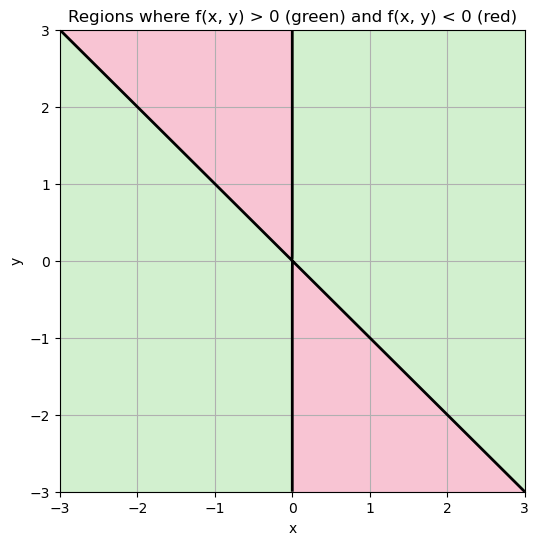

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define your polynomial here
x, y = sp.symbols('x y')
# Example: f = x**2 - y**2 + x*y - 1
f = homognization

# Convert to a numpy function (convert Poly to Expr)
f_np = sp.lambdify((x, y), f.as_expr(), 'numpy')

# Create a grid
X, Y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
Z = f_np(X, Y)

plt.figure(figsize=(6,6))
# Plot the zero set (contour where f=0)
contour = plt.contour(X, Y, Z, levels=[0], colors='k', linewidths=2)

# Ensure levels are strictly increasing for contourf
zmin = float(np.min(Z))
zmax = float(np.max(Z))
if zmin == 0:
	zmin -= 1e-8
if zmax == 0:
	zmax += 1e-8

# Fill f<0 region
plt.contourf(X, Y, Z, levels=[zmin, 0], colors=['#f38ba8'], alpha=0.5)
# Fill f>0 region
plt.contourf(X, Y, Z, levels=[0, zmax], colors=['#a6e3a1'], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regions where f(x, y) > 0 (green) and f(x, y) < 0 (red)')
plt.grid(True)
plt.show()


In [ ]:
import sympy as sp

A = sp.Matrix([
    [0, 1, 2],
    [3, 0, 4],
    [5, 6, 0]
])

eigvals = A.eigenvals()
spectral_radius = max(abs(ev.evalf()) for ev in eigvals)
print("Spectral radius:", spectral_radius)

Spectral radius: 6.73190849448848


In [ ]:
test_UpsilonStable(s, variables, trials=1000)

The coefficients are [21538.3411855923, 1120740.98405143, 14668703.4450281]
v is Matrix([[93.9292327184429, 75.1882207600436]])
p is Matrix([[2156.50364341884, 2265.52186560392]])


False

In [ ]:
f=t**2+t+3
print(sp.Poly(f,t).coeffs())

[1, 1, 3]


$-a*\alpha**2*y + a*\alpha*\beta*x - a*\alpha*c - a*\alpha*x*y - 2*a*c*x + \alpha*b*\beta*y + 2*\alpha*\beta*d + 2*\alpha*\beta*\gamma*x*y + \alpha*c*\gamma*y + \alpha*d*y - b*\beta**2*x - b*\beta*c - b*\beta*x*y - 2*b*c*y + \beta*c*\gamma*x + \beta*d*x + c**2*\gamma - c*d - c*\gamma*x*y + d*x*y$

In [ ]:
Latex(-a*alpha**2*y + a*alpha*beta*x - a*alpha*c - a*alpha*x*y - 2*a*c*x + alpha*b*beta*y + 2*alpha*beta*d + 2*alpha*beta*gamma*x*y + alpha*c*gamma*y + alpha*d*y - b*beta**2*x - b*beta*c - b*beta*x*y - 2*b*c*y + beta*c*gamma*x + beta*d*x + c**2*gamma - c*d - c*gamma*x*y + d*x*y)


NameError: name 'Latex' is not defined

In [ ]:
f=[0,1,2,3,4,5]
f=f[1:]
print(f)

[1, 2, 3, 4, 5]


In [ ]:
f1=[1,0,0,1]
f2=[0,2,0,3]
f2.append(0)
a=3
#a=random.uniform(3,10)
b=2
#b=random.uniform(0,100)
domin=[a*f2[0]]
for i in range(1,len(f2)):
    domin.append(a*f2[i]+f1[i-1]+b*f2[i-1])
print("f1 is", f1)
print("f2 is", f2[:-1])
print("at+b is", a,"t+",b)
print("(at+b)*f2+f1 is", domin)

f1 is [1, 0, 0, 1]
f2 is [0, 2, 0, 3]
at+b is 3 t+ 2
(at+b)*f2+f1 is [0, 7, 4, 9, 7]


下面展示了sympy的中如何定义多个变量, 以及多个变量的多项式。


In [ ]:
import sympy as sp
n = 4  # number of variables
d = 3  # degree
vars = sp.symbols('x0:%d' % n)  # (x0, x1, x2, x3)

# Example: monomial basis dictionary for n variables, degree <= d
poly_dict = {
    (3, 0, 0, 0): 8,
    (1, 2, 0, 0): 5,
    (0, 1, 1, 1): 7,
    (0, 0, 0, 0): 1
}

# Build sympy polynomial from monomial basis
poly_expr = sum(
    coeff * sp.Mul(*[v**e for v, e in zip(vars, exps)])
    for exps, coeff in poly_dict.items()
)
print("Sympy polynomial:", poly_expr)

x0:6
(a1, a2, a3, a4, a5)


In [ ]:
import numpy as np

def is_M_convex(A):
    """
    Check if a finite set A (subset of N^n) is M-convex.
    A should be a list of tuples, each tuple of length n.
    """
    A_set = set(A)
    n = len(A[0])
    for alpha in A:
        for beta in A:
            for i in range(n):
                if alpha[i] > beta[i]:
                    # Find j such that alpha_j < beta_j and alpha - e_i + e_j in A
                    found = False
                    for j in range(n):
                        if alpha[j] < beta[j]:
                            alpha_new = list(alpha)
                            alpha_new[i] -= 1
                            alpha_new[j] += 1
                            if min(alpha_new) < 0:
                                continue
                            if tuple(alpha_new) in A_set:
                                found = True
                                break
                    if not found:
                        return False
    return True

# Example usage:
A = [(1,1,0,0),(1,0,0,1),(0,1,1,0),(0,0,1,1)]
print("A is M-convex:", is_M_convex(A))



A is M-convex: True


In [ ]:
import sympy as sp
import random
import numpy as np
random.seed()
import math
import Garding as gd

x,y,u,w= sp.symbols('x y u w')
expr=(x+u)**2*(y+w)**2-u*w*(2*x*w+2*y*u+u*w)
poly=sp.Poly(expr,gens=[x,y,u,w],domain='QQ')
supp=gd.support(poly)
print("has poly M-convex support?", gd.is_M_convex(supp))

has poly M-convex support? False


In [62]:
import sympy as sp
import Garding as gd

#constructing a transformation from a symbol polynomial
def transform_from_symbol_poly(poly, kappa, variables):
    """"
    Given a symbol polynomial poly in variables, construct a transformation 
    """
    
    from sympy import Poly
    import math
    if isinstance(poly, sp.Expr):
        expr = poly
        poly_dict=sp.Poly(expr,variables).as_dict()
    elif isinstance(poly, sp.Poly):
        poly_dict=poly.as_dict()
    elif isinstance(poly, dict):
        poly_dict=poly
    n=len(kappa)
    m=len(variables)-n
    mapping = {}
    for key in poly_dict:
        var1 = tuple(kappa[i] - key[i] for i in range(n))
        var2 = key[n:]
        adjust_coeff = 1
        for i in range(n):
            if  var1[i]<0:
                print("kappa is smaller than exponent. cannot construct transform")
                return None
            adjust_coeff *= math.factorial(kappa[i]) / math.factorial(var1[i])/ math.factorial(key[i])
        
        coeff = poly_dict[key] / adjust_coeff
        if var1 not in mapping:
            mapping[var1] = {}
        mapping[var1][var2] = coeff
    return mapping

def evaluate_transform_poly(mapping,poly,variables=None):
    """
    Given a transform T and a polynomial f, evaluate T(f).
    """
    if isinstance(poly, sp.Expr):
        expr = poly
        poly_dict=sp.Poly(expr,variables).as_dict()
    elif isinstance(poly, sp.Poly):
        poly_dict=poly.as_dict()
        variables=poly.gens
    elif isinstance(poly, dict):
        poly_dict=poly
        if variables is None:
            variables=sp.symbols('x0:%d' % (len(list(poly_dict.keys())[0])))

    poly_dict_new={}
    for key in poly_dict:
        if not key in mapping:
            continue
        target=mapping[key]

        if not len(key)==len(variables):
            return print("variable numbers are different. cannot evaluate")
        for support in target:
            m=len(support)
            if support in poly_dict_new:
                poly_dict_new[support]+=poly_dict[key]*target[support]
            else:
                poly_dict_new[support]=target[support]*poly_dict[key]
    vars=sp.symbols('x0:%d' % m)
    return sp.Poly.from_dict(poly_dict_new,vars)

x,y,u,w=sp.symbols('x y u w')
f=(x+u)**5*(y+w)**6-x**5*y**6
var=(u,w,x,y)
kappa=(5,6)
poly=sp.Poly(f,gens=var,domain='QQ')
print("The polynomial is", poly.as_dict())
mapping=transform_from_symbol_poly(poly,kappa,var)
print(mapping)
g=(x**2+2*x+1)*(y**6*x**3+y+2)
poly2=sp.Poly(g,gens=(x,y),domain='QQ')
print("The second polynomial is", poly2)
new_poly=evaluate_transform_poly(mapping,poly2)
var2=new_poly.gens
subs={var2[0]:x,var2[1]:y}
new_poly=new_poly.as_expr().subs(subs)
print("The new polynomial is", new_poly.as_expr())
print("the difference is", sp.simplify(new_poly.as_expr()-g))





    

The polynomial is {(0, 1, 5, 5): 6, (0, 2, 5, 4): 15, (0, 3, 5, 3): 20, (0, 4, 5, 2): 15, (0, 5, 5, 1): 6, (0, 6, 5, 0): 1, (1, 0, 4, 6): 5, (1, 1, 4, 5): 30, (1, 2, 4, 4): 75, (1, 3, 4, 3): 100, (1, 4, 4, 2): 75, (1, 5, 4, 1): 30, (1, 6, 4, 0): 5, (2, 0, 3, 6): 10, (2, 1, 3, 5): 60, (2, 2, 3, 4): 150, (2, 3, 3, 3): 200, (2, 4, 3, 2): 150, (2, 5, 3, 1): 60, (2, 6, 3, 0): 10, (3, 0, 2, 6): 10, (3, 1, 2, 5): 60, (3, 2, 2, 4): 150, (3, 3, 2, 3): 200, (3, 4, 2, 2): 150, (3, 5, 2, 1): 60, (3, 6, 2, 0): 10, (4, 0, 1, 6): 5, (4, 1, 1, 5): 30, (4, 2, 1, 4): 75, (4, 3, 1, 3): 100, (4, 4, 1, 2): 75, (4, 5, 1, 1): 30, (4, 6, 1, 0): 5, (5, 0, 0, 6): 1, (5, 1, 0, 5): 6, (5, 2, 0, 4): 15, (5, 3, 0, 3): 20, (5, 4, 0, 2): 15, (5, 5, 0, 1): 6, (5, 6, 0, 0): 1}
{(5, 5): {(5, 5): 1.00000000000000}, (5, 4): {(5, 4): 1.00000000000000}, (5, 3): {(5, 3): 1.00000000000000}, (5, 2): {(5, 2): 1.00000000000000}, (5, 1): {(5, 1): 1.00000000000000}, (5, 0): {(5, 0): 1.00000000000000}, (4, 6): {(4, 6): 1.0000000000

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import Garding as gd
import sigma as sg


epsilon=0.1
f={(2,2):1,(2,1):2,(1,2):2,(0,2):epsilon,(2,0):epsilon,(1,1):epsilon*4/3,(1,0):epsilon**2*2/9,(0,1):epsilon**2*2/9,(0,0):epsilon**4}
x,y=sp.symbols('x y')
poly=sp.Poly.from_dict(f,gens=(x,y),domain='RR')
print("The polynomial is", poly)
#print("is the polynomial Upsilon-Stable?", test_UpsilonStable(poly, (x, y), trials=50))
#homognization = poly.homogenize(sp.symbols('z'))
#print("Homogenization of the polynomial is", homognization)
#print("is the homogenization Lorentzian?", gd.is_Lorentzian(homognization, homognization.gens))

# # Convert to a numpy function (convert Poly to Expr)
# f_np = sp.lambdify((x, y), poly.as_expr(), 'numpy')

# # Create a grid
# X, Y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
# Z = f_np(X, Y)

# plt.figure(figsize=(6,6))
# # Plot the zero set (contour where f=0)
# contour = plt.contour(X, Y, Z, levels=[0], colors='k', linewidths=2)

# # Ensure levels are strictly increasing for contourf
# zmin = float(np.min(Z))
# zmax = float(np.max(Z))
# if zmin == 0:
# 	zmin -= 1e-8
# if zmax == 0:
# 	zmax += 1e-8

# # Fill f<0 region
# plt.contourf(X, Y, Z, levels=[zmin, 0], colors=['#f38ba8'], alpha=0.5)
# # Fill f>0 region
# plt.contourf(X, Y, Z, levels=[0, zmax], colors=['#a6e3a1'], alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Regions where f(x, y) > 0 (green) and f(x, y) < 0 (red)')
# plt.grid(True)
# plt.show()
v=(10,1)
p=(-30,-1)
t=sp.symbols('t')
variables=(x,y)
subs={variables:v*t+p for v,p,variables in zip(v,p,variables)}
new_expr=poly.subs(subs)
newpoly=sp.Poly.as_expr(new_expr,t)
print("newpoly is", newpoly.expand())
print("The new polynomial is", new_expr.coeffs())
newpoly_poly = sp.Poly(newpoly, t)
print("is the new polynomial Upsilon-Stable?", gd.UpsilonStable(newpoly_poly.coeffs()))

The polynomial is Poly(1.0*x**2*y**2 + 2.0*x**2*y + 0.1*x**2 + 2.0*x*y**2 + 0.133333333333333*x*y + 0.00222222222222222*x + 0.1*y**2 + 0.00222222222222222*y + 0.0001, x, y, domain='RR')


In [ ]:
a=(1,2,3)
b=(3,2,1)
result = tuple(ai - bi for ai, bi in zip(a, b))
print(result)

(-2, 0, 2)
